In [ ]:
# Downlaod database to sample data
!rm -r sample_data/DB3_B/
!wget http://bias.csr.unibo.it/fvc2000/Downloads/DB3_B.zip -P sample_data
!unzip sample_data/DB3_B.zip -d sample_data/DB3_B

rm: cannot remove 'sample_data/DB3_B/': No such file or directory
--2024-03-31 23:44:30--  http://bias.csr.unibo.it/fvc2000/Downloads/DB3_B.zip
Resolving bias.csr.unibo.it (bias.csr.unibo.it)... 137.204.72.188
Connecting to bias.csr.unibo.it (bias.csr.unibo.it)|137.204.72.188|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13869044 (13M) [application/x-zip-compressed]
Saving to: ‘sample_data/DB3_B.zip.1’

DB3_B.zip.1         100%[===================>]  13.23M  5.97MB/s    in 2.2s    

2024-03-31 23:44:33 (5.97 MB/s) - ‘sample_data/DB3_B.zip.1’ saved [13869044/13869044]

Archive:  sample_data/DB3_B.zip
  inflating: sample_data/DB3_B/101_1.tif  
  inflating: sample_data/DB3_B/110_7.tif  
  inflating: sample_data/DB3_B/110_6.tif  
  inflating: sample_data/DB3_B/110_5.tif  
  inflating: sample_data/DB3_B/110_4.tif  
  inflating: sample_data/DB3_B/110_3.tif  
  inflating: sample_data/DB3_B/110_2.tif  
  inflating: sample_data/DB3_B/110_1.tif  
  inflating: sample_da

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob
import imageio

In [ ]:
img_list = list(glob.glob('*.BMP'))
print(img_list[0],img_list[1])

1__M_Left_middle_finger.BMP 1__M_Left_little_finger.BMP


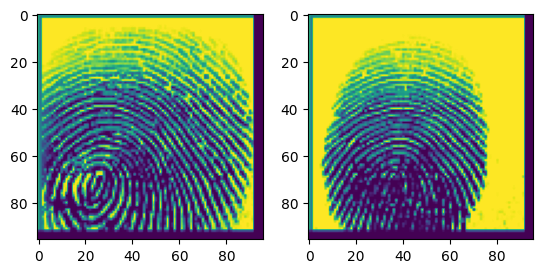

In [ ]:
img1 = cv2.imread(img_list[0],cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (96, 96))
img2 = cv2.imread(img_list[1],cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (96, 96))
fig, axes = plt.subplots(1,2);
axes[0].imshow(img1);
axes[1].imshow(img2);